<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/A_Beginner's_Guide_to_Customer_Segmentation_with%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [3]:
#Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/Mall_Customers.csv")

#View the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Check the summary statistics for the numeric columns
round(df.drop(columns="CustomerID",axis=1).describe(),2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


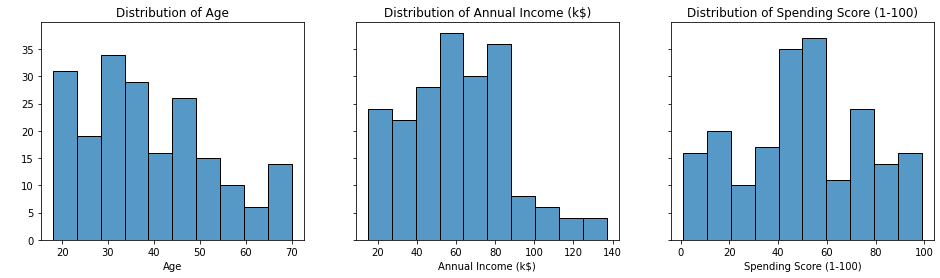

In [6]:
#Create a subplot object with one row and three columns
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=[16,4],sharey=True)

#Plot three histograms, Age, Annual Income and Spending Score
for i,col in enumerate(["Age","Annual Income (k$)","Spending Score (1-100)"]):
  sns.histplot(df[col],bins=10,ax=axes[i]).set(title=f"Distribution of {col}",ylabel=" ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, ''), Text(0.5, 1.0, 'Proportion of Males and Females')]

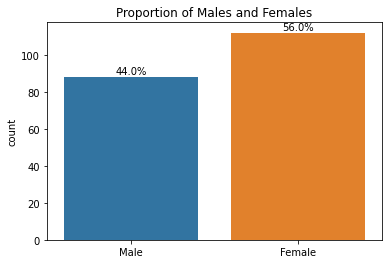

In [7]:
#Check the proportion of males and females in the dataset
ax = sns.countplot(df["Gender"])
total = len(df)

#Annotate bars with percentage values
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

ax.set(title="Proportion of Males and Females",xlabel="")



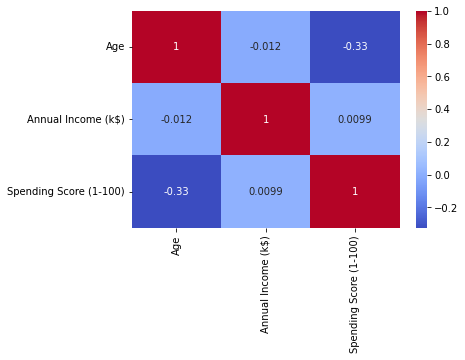

In [8]:
#Check the correlation between the different variables
corr_matrix = df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()

#Visualize the correlation using seaborn
sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)

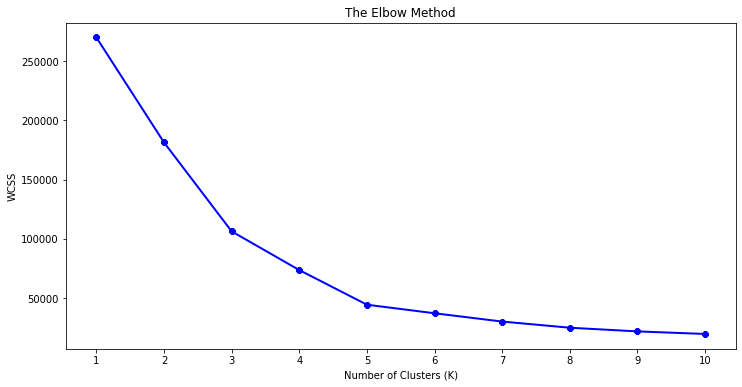

In [9]:
#Create a subset of the dataframe with only Annual Income and Spending Score
X = df[["Annual Income (k$)","Spending Score (1-100)"]]


#Determine the variation in the data
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Plot the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1,11,1))
plt.title("The Elbow Method")
plt.ylabel("WCSS")
plt.show()

In [10]:
#Build the model with 5 clusters specified
kmeans_model=KMeans(n_clusters=5)

#Fit the input data to the model
kmeans_model.fit(X)

#Segement the input data by assigning labels
y = kmeans_model.predict(X)

#Create a new column in the original dataset for the labels
df["label"] = y

#The dataframe with clustering complete
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


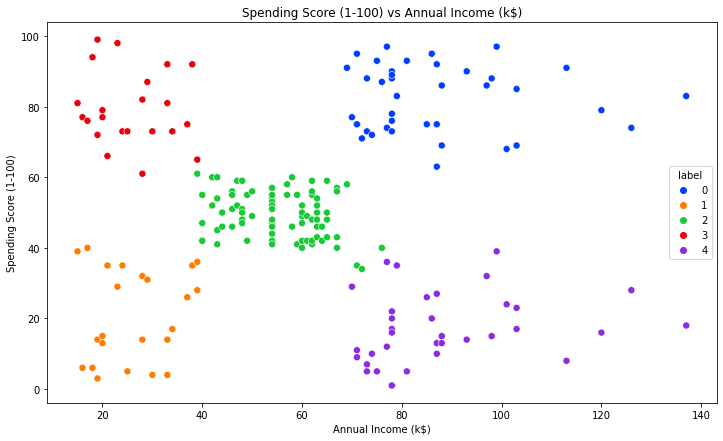

In [11]:
#Create a scatterplot to show the different clusters
plt.figure(figsize=(12,7))
sns.scatterplot(data = df, x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",palette="bright",s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

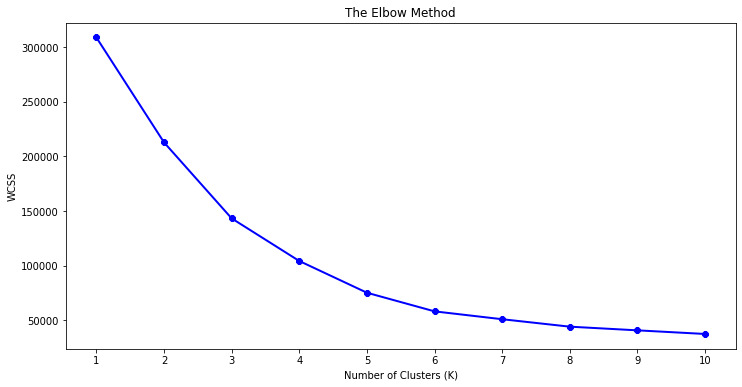

In [12]:
#Create a subset of the dataframe with only Age, Annual Income and Spending Score
X2 = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

#Determine the variation in the data
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X2)
    wcss.append(km.inertia_)

#Plot the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1,11,1))
plt.title("The Elbow Method")
plt.ylabel("WCSS")
plt.show()

In [13]:
#Build the model with 5 clusters specified
kmeans_model3D = KMeans(n_clusters=5)

#Fit the input data to the model
kmeans_model3D.fit(X2)

#Segement the input data by assigning labels
y2 = kmeans_model3D.predict(X2)

#Update the "label" column in the original dataset with the new values
df["label"] = y2

#The dataframe with clustering complete
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


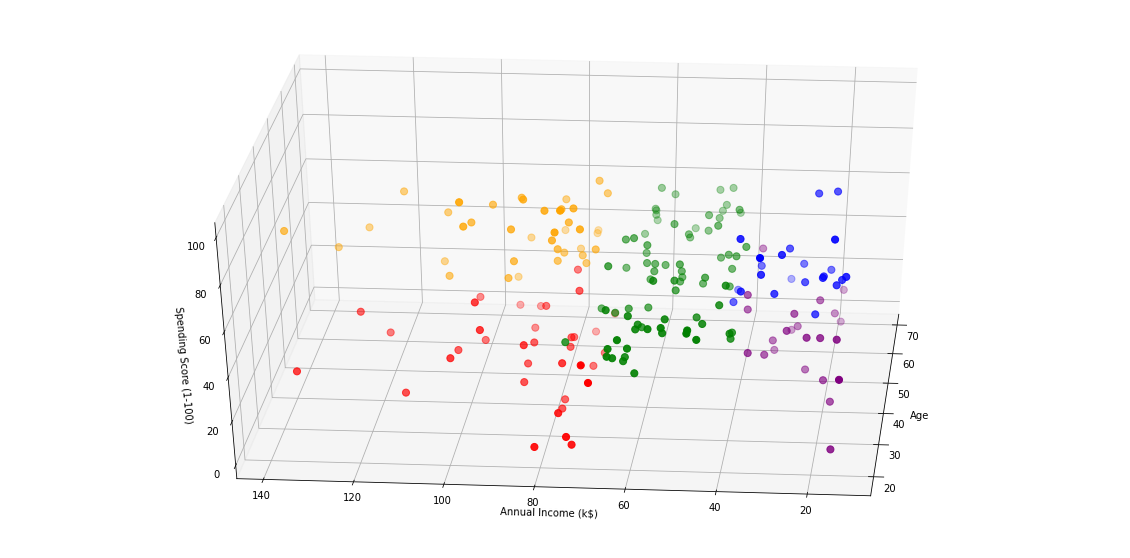

In [15]:
#Create a 3D scatter plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"][df["label"] == 0], df["Annual Income (k$)"][df["label"] == 0], df["Spending Score (1-100)"][df["label"] == 0], c='blue', s=50)
ax.scatter(df["Age"][df["label"] == 1], df["Annual Income (k$)"][df["label"] == 1], df["Spending Score (1-100)"][df["label"] == 1], c='orange', s=50)
ax.scatter(df["Age"][df["label"] == 2], df["Annual Income (k$)"][df["label"] == 2], df["Spending Score (1-100)"][df["label"] == 2], c='green', s=50)
ax.scatter(df["Age"][df["label"] == 3], df["Annual Income (k$)"][df["label"] == 3], df["Spending Score (1-100)"][df["label"] == 3], c='red', s=50)
ax.scatter(df["Age"][df["label"] == 4], df["Annual Income (k$)"][df["label"] == 4], df["Spending Score (1-100)"][df["label"] == 4], c='purple', s=50)
ax.view_init(35, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [38]:
#Check the count and mean values of all three variables for the different segments
round(df.groupby(by="label")\
        .agg({"CustomerID":"count","Age":"mean","Annual Income (k$)":"mean","Spending Score (1-100)":"mean"})\
        .reset_index()\
        .rename(columns={"label":"Segment","CustomerID":"No.of Clients"}))

,Segment,No.of Clients,Age,Annual Income (k$),Spending Score (1-100)
0,0,23,26.0,26.0,79.0
1,1,39,33.0,87.0,82.0
2,2,79,43.0,55.0,50.0
3,3,36,41.0,88.0,18.0
4,4,23,45.0,26.0,21.0
